<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#15ebe3;font-family:newtimeroman;color:#000;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>

* [0. OBJECTIVES and SCOPE](#0)
* [1. IMPORTING LIBRARIES](#1)
* [2. LOADING DATA](#2)    
* [3. DATA PIPELINE](#3) (Maleable section)
* [4. EXPLORATORY DATA ANALYSIS](#4)     
* [5. MODELING](#5)
* [6. EVALUATION](#6)
* [7. DISCUSSION](#7)  
* [8. DEPLOYMENT AND ENSEMBLES](#8)
* [9. END](#9)

<a id='0'></a>
# <p style="background-color:#15ebe3;font-family:newtimeroman;color:#000;font-size:150%;text-align:center;border-radius:10px 10px;">OBJECTIVES and SCOPE</p>

[Return to table of contents](#top)

<span style="color:#0affef">Questions</span><br><br>
Before performing EDA, we should have a clear objective. So we can make the right questions and the right visualizations.<br>
* [Q1: What are the most important factors when churn happen?](#101)
* [Q2: What are the factors of loyal customers?](#102)

<br><br>
<span style="color:#0affef">Objectives</span><br>
<hr>
<span style="color:#0affef">1) Reduce churn </span><br>
<hr>

<hr>


<a id="1"></a>
# <p style="background-color:#15ebe3;font-family:newtimeroman;color:#000;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORTING LIBRARIES</p>
[Return to table of contents](#top)

In [1]:
# Parameters
path_root = "/home/magody/programming/python/data_science/"
path_output = f"{path_root}output/"

In [2]:
# Custom libraries
import os
import sys
sys.path.append(f"{path_root}lib")

# from MongoDatabase import MongoDatabase  # type: ignore
from utils_pandas import getDeepKeyValues, typecast_column  # type: ignore
from stats import correlation_heatmap  # type: ignore
from insight import exploreSurface, describeDataset, getMissingAndDuplicates, categorizeColumns  # type: ignore
from evaluation import evaluateClassificationNeuralNetwork  # type: ignore
from feature_engineering import * # type: ignore
from pipeline import PA, PipelineCorrelation  # type: ignore

2022-05-14 11:08:58.235998: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-14 11:08:58.236047: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# General libraries
import datetime
from tqdm.notebook import tqdm
from collections import Counter

In [4]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

from textwrap import wrap

In [5]:
# machine learning
from sklearn import linear_model
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import naive_bayes
from sklearn import gaussian_process
from sklearn import discriminant_analysis
from sklearn import model_selection
from sklearn import feature_selection
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from xgboost import XGBClassifier
    
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam



# Hypertunning libraries
import keras_tuner as kt
from sklearn.model_selection import StratifiedKFold, KFold

<a id="2"></a>
# <p style="background-color:#15ebe3;font-family:newtimeroman;color:#000;font-size:150%;text-align:center;border-radius:10px 10px;">LOADING DATA</p>
[Return to table of contents](#top)

## Description

Context
It is the dataset of a U.S. bank customer for getting the information that , this particular customer will leave bank or not.

Content
Various Bank detail is given like CustomerID , surname, Credit score and many more.

Acknowledgements
This dataset is originated from a U.S. bank .

## Load

In [40]:
dataset_all: pd.DataFrame = pd.read_csv(f"{path_root}data/bank/Churn_Modelling.csv")
dataset_all.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<a id="3"></a>
# <p style="background-color:#15ebe3;font-family:newtimeroman;color:#000;font-size:150%;text-align:center;border-radius:10px 10px;">DATA PREPARATION</p>
[Return to table of contents](#top)

## Exploration

In [19]:
dataset_all.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [20]:
# Missing and duplicates
miss_numerical, miss_categorical, posible_duplicates = getMissingAndDuplicates(dataset_all)
print("miss_numerical", miss_numerical)
print("miss_categorical", miss_categorical)
print("posible_duplicates", posible_duplicates)

miss_numerical []
miss_categorical []
posible_duplicates [('Surname', 0.7068), ('Geography', 0.9997), ('Gender', 0.9998)]


In [35]:
exploreSurface(dataset_all)

,type1,type2,porc_unique,problem,unique_values
row,useless,unknown,1,"High variability, better drop this",[]
customer_id,useless,unknown,1,"High variability, better drop this",[]
surname,categorical,text,0.2932,variability,[]
credit_score,numerical,discrete,0.046,,[]
country,categorical,text,0.0003,,"[France, Germany, Spain]"
gender,categorical,text,0.0002,,"[Female, Male]"
age,numerical,discrete,0.007,,[]
tenure,categorical,text,0.0011,,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
balance,numerical,continuous,0.6382,,[]
products,categorical,text,0.0004,,"[1, 2, 3, 4]"


In [41]:
class PA:
    # Pipeline Actions
    DROP = 0
    TYPECAST = 1
    # SCALE = 2
    REPLACE = 3
    RENAME = 4
    REPLACE_WITH_MODE = 5
    REPLACE_WITH_MEDIAN = 6
    RENAME_LOWER_CASE = 7
    CREATE_DUMMIES = 8

    PIPELINE_BASE_COMMON_INT = [
        [REPLACE_WITH_MEDIAN,[np.nan]], 
        [TYPECAST,np.int16],
        [RENAME_LOWER_CASE],
    ]

    PIPELINE_BASE_COMMON_MODE_INT = [
        [REPLACE_WITH_MODE,[np.nan]],
        [TYPECAST,np.int16],
        [RENAME_LOWER_CASE],
    ]

    @staticmethod
    def is_real_number(x):
        try:
            cast_x = float(x)
            if math.isnan(cast_x):
                return False
            else:
                return True
        except:
            return False

    @staticmethod
    def exec(df: pd.DataFrame, data_scheme:dict):
        df_result: pd.DataFrame = df.copy()

        columns = df.columns
        for c in columns:
            try:
                column = c
                pipeline_actions = data_scheme.get(column,[])
                
                for pa_group in pipeline_actions:
                    pa = pa_group[0]

                    if pa == PA.DROP:
                        df_result.drop(column, axis=1,inplace=True)
                    elif pa == PA.REPLACE:
                        map_replace = {}
                        for key,value in zip(pa_group[1],pa_group[2]):
                            map_replace[key] = value

                        df_result[column].replace(map_replace, inplace=True)
                    elif pa == PA.TYPECAST:
                        df_result[column] = df_result[column].astype(pa_group[1])

                    elif pa == PA.REPLACE_WITH_MODE:
                        mode = df_result[df_result[column].notna()][column].mode()[0]
                        map_replace = {}
                        for key in pa_group[1]:
                            map_replace[key] = mode
                        df_result[column].replace(map_replace, inplace=True)

                    elif pa == PA.REPLACE_WITH_MEDIAN:
                        # works even if exist text in the column
                        median = df_result[df_result[column].apply(PA.is_real_number)][column].median()
                        map_replace = {}
                        for key in pa_group[1]:
                            map_replace[key] = median
                        df_result[column].replace(map_replace, inplace=True)
                    elif pa == PA.RENAME:
                        column_new = pa_group[1]
                        df_result.rename(columns={column: column_new}, inplace=True)
                        column = column_new
                    elif pa == PA.RENAME_LOWER_CASE:
                        column_new = column.lower()
                        df_result.rename(columns={column: column_new}, inplace=True)
                        column = column_new
                    elif pa == PA.CREATE_DUMMIES:
                        df_result = df_result.join(pd.get_dummies(df_result[column], prefix=column))
                        df_result.drop(column, axis=1, inplace=True)
                    else:
                        print("ERROR, unknown PA", pa)

            except Exception as e:
                print(f"Error while processing column '{column}': {e}")


        return df_result


In [42]:
pipeline_format_actions = {
    'RowNumber': [
        [PA.DROP]
    ],
    'CustomerId': [
        [PA.DROP]  # only for this case, other wise EDA over customer
    ],
    'Surname': [
        [PA.RENAME_LOWER_CASE],
        [PA.TYPECAST,str]
    ],
    'CreditScore': [
        [PA.RENAME, "credit_score"],
        [PA.TYPECAST, np.int32]
    ],
    'Geography': [
        [PA.RENAME, "country"],
        [PA.CREATE_DUMMIES]  # auto drop the column
    ],
    'Gender': [
        [PA.RENAME_LOWER_CASE],
        [PA.REPLACE,["Female","Male"],[0,1]],
        [PA.TYPECAST, np.int16]
    ],
    "Age":[
        [PA.RENAME_LOWER_CASE],
        [PA.TYPECAST, np.int16]
    ],
    "Tenure":[
        [PA.RENAME_LOWER_CASE],
        [PA.TYPECAST, np.int16]
    ],
    "Balance":[
        [PA.RENAME_LOWER_CASE],
        [PA.TYPECAST, np.float64]
    ],
    "NumOfProducts":[
        [PA.RENAME, "products"],
        [PA.TYPECAST, np.int16]
    ],
    "HasCrCard":[
        [PA.RENAME, "has_credit_card"],
        [PA.TYPECAST, np.int16]
    ],
    "IsActiveMember":[
        [PA.RENAME, "is_active_member"],
        [PA.TYPECAST, np.int16]
    ],
    "EstimatedSalary":[
        [PA.RENAME, "salary"],
        [PA.TYPECAST, np.float64]
    ],
    "Exited": [
        [PA.RENAME, "churn"],
        [PA.TYPECAST, np.int16]
    ]
}

In [43]:
class PipelineDataFormat:
    """Reusable pipeline to manage data loading and initial preparation: 
    missing, duplicated, names and types. Not advanced engineering
    """
    def __init__(self):
        pass
    
    def handle_missing(self, df:pd.DataFrame):
        return df
    
    def handle_duplicated(self, df:pd.DataFrame):
        return df
        
    def execute_pipeline_actions(self, df:pd.DataFrame, pipeline_actions:dict):
        df_fit = df.copy()
        
        df_fit = self.handle_missing(df_fit)
        df_fit = self.handle_duplicated(df_fit)
        
        df_fit = PA.exec(df_fit, pipeline_actions)
        
        return df_fit

dataset_all = PipelineDataFormat().execute_pipeline_actions(dataset_all, pipeline_format_actions)
dataset_all.head()

,surname,credit_score,gender,age,tenure,balance,products,has_credit_card,is_active_member,salary,churn,country_France,country_Germany,country_Spain
0,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


<a id="4"></a>
# <p style="background-color:#15ebe3;font-family:newtimeroman;color:#000;font-size:150%;text-align:center;border-radius:10px 10px;">EXPLORATORY DATA ANALYSIS</p>
[Return to table of contents](#top)

## Data understanding

In [44]:
dataset_all.describe()

,credit_score,gender,age,tenure,balance,products,has_credit_card,is_active_member,salary,churn,country_France,country_Germany,country_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


## Visualization

<BarContainer object of 3 artists>

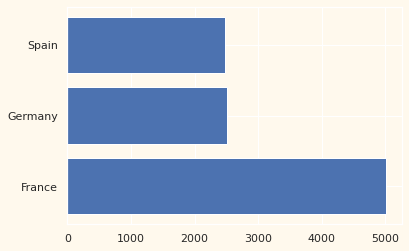

In [48]:
plt.barh(["France","Germany","Spain"],[
    dataset_all["country_France"].sum(),
    dataset_all["country_Germany"].sum(),
    dataset_all["country_Spain"].sum()
])

<AxesSubplot:xlabel='count', ylabel='churn'>

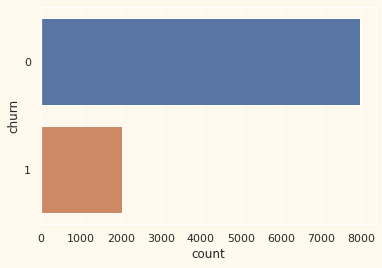

In [45]:
sns.countplot(y="churn", data=dataset_all)
# is imbalanced

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 432x288 with 0 Axes>

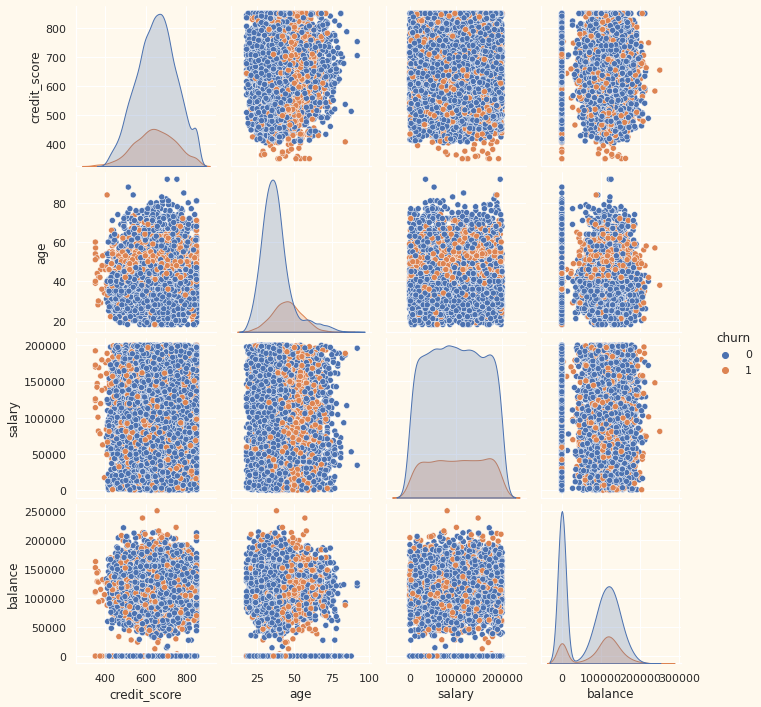

In [32]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})

pair_plot_columns = [ "credit_score", "age", 'salary', 'balance', "churn"]
plt.figure()
sns.pairplot(dataset_all[pair_plot_columns], hue= "churn")
plt.show()

In [ ]:
sns.jointplot(x='average_view_ratio', y='click_through_rate', data=q2_shorts, kind='reg')

sns.jointplot(x='average_view_ratio', y='view_count', data=q2_normal, kind='hex')

In [ ]:
sns.barplot(x="country",y="view_count",data=country_top10_view, estimator=np.median)

In [57]:
dataset_all[["surname", "churn"]].groupby(["surname"], as_index=False).sum().sort_values("churn", ascending=False).head(30)

,surname,churn
1689,Martin,9
2473,Smith,9
1558,Lin,9
1746,McGregor,9
1621,Ma,7
1572,Lo,7
2762,Wang,7
576,Cocci,7
2436,Shih,7
1669,Manna,7


## Pivoting

### Numerical

In [ ]:
# pivot by mean
pd.pivot_table(dataset, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

In [ ]:
g = sns.FacetGrid(dataset, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.show()
g.map(plt.hist, 'Fare', bins=20)
plt.show()

print(dataset[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean().sort_values('Survived', ascending=False))
print(dataset[['Parch', 'Survived']].groupby('Parch', as_index=False).mean().sort_values('Survived', ascending=False))


### Categorical

In [ ]:
features_categorical = ['Sex', 'Embarked']
features_ordinal = ['Pclass']

for c in features_categorical:
    print(dataset[[c, 'Survived']].groupby(c, as_index=False).mean().sort_values('Survived', ascending=False))
for o in features_ordinal:
    print(dataset[[o, 'Survived']].groupby(o, as_index=False).mean().sort_values('Survived', ascending=False))
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(dataset, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [ ]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(dataset, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## Feature engineering analysis

In [ ]:
dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

print(pd.crosstab(dataset['Title'], dataset['Sex']))

In [ ]:
# VARIANCE
low_variance_columns, low_variance_heights = getVarianceLowColumns(dataset, threshold=0.1)
dataset = dataset.drop(low_variance_columns, axis=1)
X = dataset.drop('target', axis=1)
y = dataset['target']
print(len(X.columns), "variance features")

# Multicolinearity
multicolinear_columns = getMulticolinearColumns(X.corr(), keep_features_min = 20)
X = X.drop(multicolinear_columns, axis=1)
print(len(X.columns), "Multicolinearity features")

# Low correlation
low_correlations_labels, low_correlations_abs = getLowCorrelationsWithTarget(X, y, min_correlation=0.1)
X = X.drop(low_correlations_labels, axis=1)
plt.barh(low_correlations_labels, low_correlations_abs)
plt.title("Low correlation")
plt.show()
print(len(X.columns), "with high correlation features", low_correlations_labels)

number_features_to_select = int(len(X.columns) * 0.8)

# Important features, the 80% most important
if number_features_to_select > 0 and number_features_to_select < len(X.columns):
    features_important = getImportantFeatures(X, y, number_features_to_select, max_features = 6)
    print(features_important)
    print(number_features_to_select, "important features")
    X = X.loc[:,features_important]
else:
    print("No important features selected")

"""
import pylab as pl
n_components = int(number_features_to_select * 0.8)
X_reduced_PCA, pca = reducePCA(X, n_components = 4)
pl.figure(figsize=(12,9))
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
ax1.plot(pca.explained_variance_ratio_, linewidth=2)
ax2.plot(pca.explained_variance_ratio_.cumsum(), linewidth=3, color='r')
plt.title("PCA")
plt.show()
print(len(X.columns), "n_components features")
"""



## Correlation

In [ ]:
correlation_heatmap(X_EDA, figsize=(24,16))

In [ ]:
#Get list of categorical variables
s = (X_EDA.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

## Dimensionality reduction

### PCA
- Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

In [ ]:
n_components = 3 # reduce to this dimensions
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(X_EDA)
PCA_ds = pd.DataFrame(pca.transform(X_EDA), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## Insights
- 


<a id="4"></a>
# <p style="background-color:#15ebe3;font-family:newtimeroman;color:#000;font-size:150%;text-align:center;border-radius:10px 10px;">DATA ENGINEERING</p>
[Return to table of contents](#top)

In [71]:
class PipelineDataEngineering:
    
    def __init__(self, target=[], dimension_reduction_to=-1) -> None:
        self.mask_importances = []
        self.dimension_reduction_to = dimension_reduction_to
        self.is_training = True
        self.target = target

    def featureEngineering(self, dataset:pd.DataFrame):
        dataset = dataset.drop(columns=["surname"])
        return dataset

    def processOutliers(self, dataset:pd.DataFrame):
        return dataset

    def scaleData(self, X_raw:pd.DataFrame, y=None):
        
        #Scaling
        scaler = StandardScaler()
        scaler.fit(X_raw)
        X_raw = pd.DataFrame(scaler.transform(X_raw),columns= X_raw.columns)
        return X_raw, y


    def reduceDimension(self, X_raw:pd.DataFrame, y=None):
        # Usually PCA or feature importance with random forests
        
        if self.dimension_reduction_to == -1:
            return X_raw, y

        #Initiating PCA to reduce dimentions aka features to 3
        pca = PCA(n_components=self.dimension_reduction_to)
        pca.fit(X_raw)

        columns = [f"col{i}" for i in range(1,self.dimension_reduction_to+1)]

        PCA_ds = pd.DataFrame(pca.transform(X_raw), columns=(columns))
        return PCA_ds, y

        
    def transform(self, dataset:pd.DataFrame):
        
        dataset_clean = dataset.copy()
        
        dataset_clean = self.featureEngineering(dataset_clean)
        dataset_clean = self.processOutliers(dataset_clean)
        
        X_clean = dataset_clean.drop(columns=self.target)
        y_clean = dataset_clean.loc[:, self.target]
        X_clean, y_clean = self.scaleData(X_clean, y_clean)
        X_clean, y_clean = self.reduceDimension(X_clean, y_clean)

        return X_clean.to_numpy(), y_clean.to_numpy()

pipelineDataEngineering = PipelineDataEngineering(target=["churn"])

X, y = pipelineDataEngineering.transform(dataset_all)
print(X.shape, y.shape)

(10000, 12) (10000, 1)


<a id="5"></a>
# <p style="background-color:#15ebe3;font-family:newtimeroman;color:#000;font-size:150%;text-align:center;border-radius:10px 10px;">MODELING</p>
[Return to table of contents](#top)

## Baseline

In [79]:
y.reshape((len(y)))[:].shape

(10000,)

In [81]:
y_h = y.reshape((len(y)))[:]

model_logistic = linear_model.LogisticRegression()
model_logistic.fit(X, y_h)
print(model_logistic.score(X, y_h))
del y_h

0.8103


## Neural Network

Epoch 1/120
125/125 [==============================] - 1s 5ms/step - loss: 0.7534 - accuracy: 0.5630 - val_loss: 0.5891 - val_accuracy: 0.7675
Epoch 2/120
125/125 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.7629 - val_loss: 0.5057 - val_accuracy: 0.8050
Epoch 3/120
125/125 [==============================] - 0s 2ms/step - loss: 0.5227 - accuracy: 0.7878 - val_loss: 0.4809 - val_accuracy: 0.8050
Epoch 4/120
125/125 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.7929 - val_loss: 0.4665 - val_accuracy: 0.8035
Epoch 5/120
125/125 [==============================] - 0s 2ms/step - loss: 0.4930 - accuracy: 0.7952 - val_loss: 0.4574 - val_accuracy: 0.8020
Epoch 6/120
125/125 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7951 - val_loss: 0.4489 - val_accuracy: 0.8030
Epoch 7/120
125/125 [==============================] - 0s 2ms/step - loss: 0.4764 - accuracy: 0.7952 - val_loss: 0.4436 - val_accuracy: 0.8010

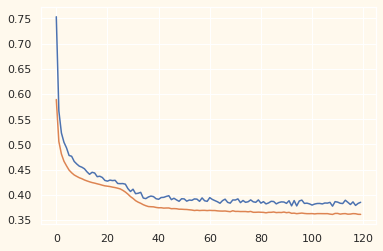

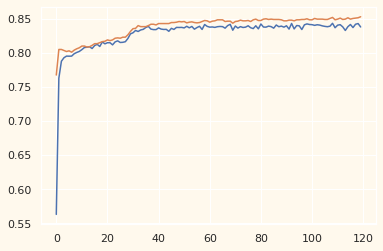

In [83]:
# Explorate the neural network
# input_shape = (len(X_train[0]),)

model = Sequential(
    layers=[
        Dense(8, kernel_initializer='he_normal', activation="relu"),
        Dropout(0.2),
        Dense(4, kernel_initializer='he_normal', activation="relu"),
        Dropout(0.1),
        Dense(1, kernel_initializer='he_normal', activation="sigmoid")
    ]
)
adam = Adam(learning_rate=0.001)

model.compile(loss="binary_crossentropy", optimizer=adam, metrics=['accuracy']) # 

EPOCHS = 120

h = model.fit(
    X, 
    y,
    epochs=EPOCHS,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)
history = h.history
plt.plot(history["loss"])
plt.plot(history["val_loss"])
plt.show()
plt.plot(history["accuracy"])
plt.plot(history["val_accuracy"])
plt.show()


In [ ]:
# TUNNING
global input_shape
input_shape = (len(X_train[0]),)

EPOCHS=30
BATCH_SIZE=64
TRIALS=20

def build_model(hp):
    global input_shape
    model = Sequential()
    model.add(
        Dense(hp.Int('units', min_value=6, max_value=64, step=2), 
              kernel_initializer='he_normal', activation="relu", input_shape=input_shape)
    )
    model.add(Dropout(hp.Float('dropout1', min_value=0.1, max_value=0.5)))
    
    model.add(
        Dense(hp.Int('units2', min_value=2, max_value=64, step=2), 
            kernel_initializer='he_normal', activation="relu")
    )
    model.add(Dropout(hp.Float('dropout2', min_value=0, max_value=0.3)))
        
    
    model.add(Dense(1, activation="sigmoid"))

    adam = Adam(learning_rate=hp.Float('learning_rate', min_value=0.0001, max_value=0.01))

    model.compile(
        loss="binary_crossentropy",
        optimizer=adam, 
        metrics=['accuracy', backend_f1_score])
    return model

tuner = kt.RandomSearch(
    build_model,
    # objective='val_backend_f1_score',
    objective=kt.Objective("val_accuracy", direction="max"),
    max_trials=TRIALS,
    overwrite=True
)


tuner.search(
    X_train, 
    y_train.reshape((len(y_train), 1)),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    verbose=0
)

best_hp = tuner.get_best_hyperparameters()[0]
print("best_hp", best_hp.get_config())


## Grid search

In [ ]:
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

param_grid = dict()

grid_search_knn = GridSearchCV(knn, param_grid=param_grid, cv=10, scoring='accuracy').fit(gmm_X_train, y_train)
knn_best = grid_search_knn.best_estimator_

grid_search_rf = GridSearchCV(rf, param_grid=dict(), cv=10, scoring='accuracy').fit(gmm_X_train, y_train)
rf_best = grid_search_rf.best_estimator_

print("Best estimator KNN: ", grid_search_knn.best_estimator_,
     "Best score: ", grid_search_knn.best_estimator_.score(gmm_X_test, y_test))
print("Best estimator RandomForest: ", grid_search_rf.best_estimator_,
     "Best score: ", grid_search_rf.best_estimator_.score(gmm_X_test, y_test))

knn_best.fit(gmm_X_train, y_train)
rf_best.fit(gmm_X_train, y_train)

In [ ]:
skfold = StratifiedKFold(n_splits=10, shuffle=True)

best_score = -1
model_nn = None
history = None

# The general X_test and X_train will be selected here?

for index_train, index_test in skfold.split(X, y):
    split_model = build_model(best_hp)

    split_X_train = X[index_train]
    split_y_train = y[index_train]
    split_X_test = X[index_test]
    split_y_test = y[index_test]
    
    h = split_model.fit(split_X_train, split_y_train, batch_size=BATCH_SIZE, verbose=0, epochs=EPOCHS, validation_split=0.1)
    evaluation = split_model.evaluate(split_X_test, split_y_test)
    acc = evaluation[1]
    
    if acc > best_score:
        best_score = acc
        model_nn = split_model
        history = h.history
        X_test = split_X_test
        y_test = split_y_test
    
evaluateClassificationNeuralNetwork(history, model_nn, X_test, y_test, target_names=["0", "1"], metrics=["accuracy", "loss"])

## MLA

### Overview

In [ ]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(n_neighbors=3),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier(eval_metric='mlogloss')    
]

#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = pd.DataFrame(data={'Label': y})

#index through MLA and save performance to table
row_index = 0
for model in MLA:

    #set name and parameters
    MLA_name = model.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(model.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(model, X, y, cv  = cv_split)
    # print(cv_results)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    model.fit(X, y)
    MLA_predict[MLA_name] = model.predict(X)
    
    row_index+=1


MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare


In [ ]:
correlation_heatmap(MLA_predict)

### Tunning MLA models

In [ ]:
#tune hyper-parameters: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
param_grid_dt = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              #'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
              'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
              #'min_samples_split': [2,5,10,.03,.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              #'min_samples_leaf': [1,5,10,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              #'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
              'random_state': [0] #seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
             }

model_dt = tuneModel('model_dt', X, y, tree.DecisionTreeClassifier(), param_grid_dt, cv_split)

param_grid_gd = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300,400],
              'learning_rate': [0.1, 0.05, 0.01,0.001],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.2,0.1] 
              }
model_gb = tuneModel('model_gb', X, y, ensemble.GradientBoostingClassifier(), param_grid_gd, cv_split)

param_grid_rf = {"n_estimators" : range(100,1000,100)}
model_rf = tuneModel('model_rf', X, y, ensemble.RandomForestClassifier(), param_grid_rf, cv_split)

param_grid_svc = {'kernel': ['rbf','linear'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}
model_svc = tuneModel('model_svc', X, y, svm.SVC(probability=True), param_grid_svc, cv_split)

param_grid_logistic = {}
model_logistic = tuneModel('model_logistic', X, y, linear_model.LogisticRegressionCV(), param_grid_logistic, cv_split)


<a id="6"></a>
# <p style="background-color:#15ebe3;font-family:newtimeroman;color:#000;font-size:150%;text-align:center;border-radius:10px 10px;">EVALUATION</p>
[Return to table of contents](#top)

In [ ]:
best_hp = tuner.get_best_hyperparameters()[0]
best_model = build_model(best_hp)

h = best_model.fit(X_train, y_train, batch_size=BATCH_SIZE, verbose=0, epochs=EPOCHS, validation_split=0.1)
  
evaluateClassificationNeuralNetwork(h.history, best_model, X_test, y_test, target_names=["0", "1"], metrics=["accuracy", "loss"])

<a id="7"></a>
# <p style="background-color:#15ebe3;font-family:newtimeroman;color:#000;font-size:150%;text-align:center;border-radius:10px 10px;">DISCUSSION</p>
[Return to table of contents](#top)

## Patterns study

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=X_clean["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
pl = sns.scatterplot(data = X_clean,x=X_clean["Spent"], y=X_clean["Income"],hue=X_clean["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

## Profiling

## Conclusions
- 

<a id="8"></a>
# <p style="background-color:#15ebe3;font-family:newtimeroman;color:#000;font-size:150%;text-align:center;border-radius:10px 10px;">DEPLOYMENT AND ENSEMBLES</p>
[Return to table of contents](#top)

In [ ]:
# why choose one model, when you can pick them all with voting classifier
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
#removed models w/o attribute 'predict_proba' required for vote classifier and models with a 1.0 correlation to another model
vote_est = [
    ('gd', model_gb),
    ('lr', model_logistic),
    ('svc', model_svc),
    ('dt', model_dt),
    ('rf', model_rf),
]


#Hard Vote or majority rules
vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, X, y, cv  = cv_split)
vote_hard.fit(X, y)
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))

#Soft Vote or weighted probabilities
vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, X, y, cv  = cv_split)
vote_soft.fit(X, y)
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))


In [ ]:
y_submission = knn_best.predict(gmm_X_submission)
knn_best_pred = pd.DataFrame(data={
    'Id': np.arange(1, len(y_submission) + 1),
    'Solution': y_submission
})
knn_best_pred.to_csv('submission.csv', index=False)

<a id="9"></a>
# <p style="background-color:#15ebe3;font-family:newtimeroman;color:#000;font-size:150%;text-align:center;border-radius:10px 10px;">END</p>

[Return to table of contents](#top)